Q.3
Perform Regression Task using ANN

Note: You are feel free to use any Regression ML dataset

In [1]:
#import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the Boston Housing dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
# Standardize the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [4]:
# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    #Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),
    #Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(32, activation='relu'),
    #Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression task
])

In [5]:
# Compile the model with a custom optimizer and learning rate
#optimizer = Adam(learning_rate=0.001)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.95)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [6]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
11/11 [==============================] - 2s 25ms/step - loss: 653.7984 - val_loss: 2659.5193
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 993.3383 - val_loss: 168.0303
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 258.5382 - val_loss: 269.8943
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 152.0900 - val_loss: 182.8086
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 81.2473 - val_loss: 86.7154
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 58.7944 - val_loss: 69.2359
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 41.4720 - val_loss: 35.2220
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 28.3632 - val_loss: 23.2044
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 15.5901 - val_loss: 17.2548
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 11.9884

In [8]:
# Evaluate the model
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

4/4 [==============================] - 0s 3ms/step
Mean Squared Error: 17.60235044223532


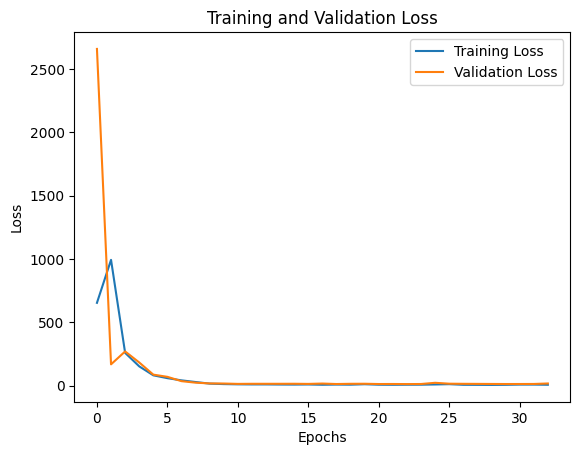

In [9]:
# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()